# 손동작 분류 경진대회

주어진 센서 데이터를 통해 손동작(target)을 분류하는 대회.

target은 총 4개의 class로 이루어짐.

## 0. 모듈 임포트

In [ ]:
# from google.colab import drive
# drive.mount('/content/drive')

In [ ]:
import pandas as pd
import numpy as np

import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

import warnings
warnings.filterwarnings("ignore")

from sklearn.preprocessing import StandardScaler
from sklearn.model_selection import train_test_split
from sklearn.linear_model import LogisticRegression
from sklearn.ensemble import RandomForestClassifier
from sklearn.ensemble import AdaBoostClassifier

## 1. 데이터 불러오기

In [ ]:
data_path = "/content/drive/MyDrive/Colab Notebooks/dacon/손동작 분류 경진대회/hand_gesture_data/"

In [ ]:
train_df = pd.read_csv(data_path + "train.csv").drop("id", axis=1)
test_df = pd.read_csv(data_path + "test.csv").drop("id", axis=1)
submission_df = pd.read_csv(data_path + "sample_submission.csv")

## 2. 데이터 분석하기

### 데이터 출력

In [ ]:
print(train_df.shape)
print(test_df.shape)

데이터 개수가 2335개면 파라미터가 많은 모델을 사용하기 조금 적은 데이터이고, 테스트 데이터가 훨씬 많은 것도 특징입니다.

In [ ]:
# train_data head 부분 출력

train_df.head()

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,...,sensor_24,sensor_25,sensor_26,sensor_27,sensor_28,sensor_29,sensor_30,sensor_31,sensor_32,target
0,-6.149463,-0.929714,9.058368,-7.017854,-2.958471,0.179233,-0.956591,-0.972401,5.956213,4.145636,...,-7.026436,-6.006282,-6.005836,7.043084,21.884650,-3.064152,-5.247552,-6.026107,-11.990822,1
1,-2.238836,-1.003511,5.098079,-10.880357,-0.804562,-2.992123,26.972724,-8.900861,-5.968298,-4.060134,...,-1.996714,-7.933806,-3.136773,8.774211,10.944759,9.858186,-0.969241,-3.935553,-15.892421,1
2,19.087934,-2.092514,0.946750,-21.831788,9.119235,17.853587,-21.069954,-15.933212,-9.016039,-5.975194,...,-6.889685,54.052330,-6.109238,12.154595,6.095989,-40.195088,-3.958124,-8.079537,-5.160090,0
3,-2.211629,-1.930904,21.888406,-3.067560,-0.240634,2.985056,-29.073369,0.200774,-1.043742,2.099845,...,-2.126170,-1.035526,2.178769,10.032723,-1.010897,-3.912848,-2.980338,-12.983597,-3.001077,1
4,3.953852,2.964892,-36.044802,0.899838,26.930210,11.004409,-21.962423,-11.950189,-20.933785,-4.000506,...,-2.051761,10.917567,1.905335,-13.004707,17.169552,2.105194,3.967986,11.861657,-27.088846,2


In [ ]:
# train data tail 부분 출력
train_df.tail()

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,...,sensor_24,sensor_25,sensor_26,sensor_27,sensor_28,sensor_29,sensor_30,sensor_31,sensor_32,target
2330,-3.971043,39.913391,16.034626,-19.067697,8.061361,-70.916786,-39.937026,12.834223,-21.937973,14.942994,...,3.086417,-4.954858,-11.106802,-37.863399,31.069292,-4.097017,-13.095192,-5.150284,8.016265,3
2331,-3.011710,-4.060355,-1.046067,4.178137,-2.003243,-2.895017,-2.766757,-29.099123,-4.208953,-4.793855,...,6.871938,-0.134367,-0.867018,23.892336,-11.977934,1.984203,0.891666,28.822082,-0.878670,3
2332,-9.001824,5.985711,-8.146347,-10.902201,5.102105,8.133692,32.877614,-3.017438,-3.174442,-5.724941,...,-7.952857,2.049467,-5.825790,-37.989569,15.014132,1.160272,-11.135889,-7.035763,-0.930067,3
2333,-3.987992,3.011460,-11.949323,-3.810885,16.880234,-5.150117,9.182801,4.960190,-21.002525,-1.881519,...,3.080276,2.054739,-1.052350,-6.019488,-7.075333,-5.826058,-3.989168,14.916905,-12.093426,1
2334,-1.838225,-7.023497,-45.877365,20.026927,4.058551,8.062100,19.083782,-21.881795,-9.106341,-1.056355,...,31.130021,5.121935,-1.003704,-58.953961,-22.095226,-0.898581,1.164833,-21.977991,-13.060285,2


In [ ]:
# test data head 부분 출력

test_df.head()

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,...,sensor_23,sensor_24,sensor_25,sensor_26,sensor_27,sensor_28,sensor_29,sensor_30,sensor_31,sensor_32
0,0.067135,5.040383,-2.965405,-12.952880,-1.938465,-10.997802,1.853669,21.077862,7.963131,0.009773,...,8.128448,5.871833,1.889536,-3.926719,0.929041,4.999071,-7.963270,4.044370,-1.993315,10.855771
1,6.890655,-12.010728,24.881907,38.943245,-4.757496,5.926453,7.923851,3.925545,4.012127,-6.921524,...,-7.941582,-27.106928,-16.940167,-11.169073,0.202975,6.846631,7.911875,-2.852819,56.028042,52.967175
2,-4.809695,0.962863,-1.893647,-6.168084,-3.948282,0.977219,12.960620,-9.048958,5.969053,0.874370,...,-0.895094,-7.984137,-0.025761,2.981749,4.948704,-10.841968,-4.860024,-6.917495,2.842422,-3.081374
3,0.018158,-3.993114,12.001667,22.960746,-2.121793,-6.002385,2.173744,1.045248,1.073869,-0.019322,...,-10.084452,2.828070,0.903349,5.156367,40.827713,-1.160840,-1.215552,0.037914,-24.968873,-7.148603
4,-7.841592,-2.129997,7.872448,-8.953428,28.080007,-5.019895,-10.922551,-15.045833,-56.981894,-8.831718,...,-2.000975,-23.942689,-6.741350,0.831967,11.905613,3.106004,46.899363,3.001353,-17.881074,-6.882390


In [ ]:
# test data tail 부분 출력

test_df.tail()

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,...,sensor_23,sensor_24,sensor_25,sensor_26,sensor_27,sensor_28,sensor_29,sensor_30,sensor_31,sensor_32
9338,7.963652,7.973099,12.877346,11.015341,-0.963491,-3.926525,-30.875620,6.022538,-1.934085,-2.019713,...,-6.913374,-28.872380,-0.822110,3.043326,11.113028,11.160472,2.034703,-0.056564,-3.959809,22.986533
9339,-7.974772,0.997146,8.011316,-10.007376,1.065419,-15.090632,1.916883,-2.981494,2.948488,12.012327,...,0.972399,-4.158987,-4.971529,-9.957906,19.081232,-3.056299,-0.714567,-0.859710,7.950773,2.952029
9340,4.035916,-10.138330,5.943174,8.080807,28.007780,4.981148,23.084630,-30.048268,9.877151,-2.048269,...,-11.013990,-26.176325,23.143486,4.913298,25.066640,4.044110,-1.948533,1.921691,13.952396,11.866490
9341,8.920498,0.033165,20.058309,68.132886,4.037498,19.068331,-4.109146,-4.067740,-11.044263,1.134035,...,-7.072355,-18.864597,2.902505,-13.936057,3.058599,33.004942,2.932643,9.968502,-3.097104,7.966220
9342,1.042177,-2.928366,-34.982431,-0.114721,-0.127424,2.003162,61.955343,-0.128017,-0.006172,-1.211008,...,-12.129050,-1.998121,0.886503,4.933997,-68.115156,13.871766,0.941964,3.811566,77.962102,-22.973813


In [ ]:
submission_df.head()

,id,target
0,1,0
1,2,0
2,3,0
3,4,0
4,5,0


### 결측치 확인

In [ ]:
# 결측치 확인 
train_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 2335 entries, 0 to 2334
Data columns (total 33 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sensor_1   2335 non-null   float64
 1   sensor_2   2335 non-null   float64
 2   sensor_3   2335 non-null   float64
 3   sensor_4   2335 non-null   float64
 4   sensor_5   2335 non-null   float64
 5   sensor_6   2335 non-null   float64
 6   sensor_7   2335 non-null   float64
 7   sensor_8   2335 non-null   float64
 8   sensor_9   2335 non-null   float64
 9   sensor_10  2335 non-null   float64
 10  sensor_11  2335 non-null   float64
 11  sensor_12  2335 non-null   float64
 12  sensor_13  2335 non-null   float64
 13  sensor_14  2335 non-null   float64
 14  sensor_15  2335 non-null   float64
 15  sensor_16  2335 non-null   float64
 16  sensor_17  2335 non-null   float64
 17  sensor_18  2335 non-null   float64
 18  sensor_19  2335 non-null   float64
 19  sensor_20  2335 non-null   float64
 20  sensor_2

In [ ]:
# 결측치 확인 

test_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 9343 entries, 0 to 9342
Data columns (total 32 columns):
 #   Column     Non-Null Count  Dtype  
---  ------     --------------  -----  
 0   sensor_1   9343 non-null   float64
 1   sensor_2   9343 non-null   float64
 2   sensor_3   9343 non-null   float64
 3   sensor_4   9343 non-null   float64
 4   sensor_5   9343 non-null   float64
 5   sensor_6   9343 non-null   float64
 6   sensor_7   9343 non-null   float64
 7   sensor_8   9343 non-null   float64
 8   sensor_9   9343 non-null   float64
 9   sensor_10  9343 non-null   float64
 10  sensor_11  9343 non-null   float64
 11  sensor_12  9343 non-null   float64
 12  sensor_13  9343 non-null   float64
 13  sensor_14  9343 non-null   float64
 14  sensor_15  9343 non-null   float64
 15  sensor_16  9343 non-null   float64
 16  sensor_17  9343 non-null   float64
 17  sensor_18  9343 non-null   float64
 18  sensor_19  9343 non-null   float64
 19  sensor_20  9343 non-null   float64
 20  sensor_2

### 기초 통계 분석

In [ ]:
train_df.describe()

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,...,sensor_24,sensor_25,sensor_26,sensor_27,sensor_28,sensor_29,sensor_30,sensor_31,sensor_32,target
count,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,...,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000,2335.000000
mean,-1.122174,-1.024673,-0.672769,-0.147724,-0.327494,-0.423462,0.676275,-0.936019,-0.797432,-0.704585,...,-0.356441,-0.927744,-0.589060,-0.081374,-0.370812,-0.726941,-0.809534,-0.495062,-0.743585,1.523340
std,11.486353,7.399859,26.519159,15.551500,11.461970,7.314322,26.869479,15.598104,12.015022,7.384626,...,16.531906,12.021560,7.440983,25.923355,15.541803,11.636507,7.469744,25.291238,16.300385,1.118221
min,-94.746969,-63.942094,-122.195138,-111.870691,-94.147972,-70.916786,-105.956553,-102.965354,-81.268085,-47.937561,...,-127.797649,-99.115177,-86.193378,-105.751637,-105.890010,-74.977182,-74.006065,-121.097086,-123.876153,0.000000
25%,-4.036597,-4.031957,-14.878500,-7.116633,-3.968687,-3.957699,-13.937806,-8.053214,-4.031148,-3.983620,...,-7.980628,-4.004750,-4.001112,-14.096840,-8.004561,-3.981055,-3.988965,-13.998874,-7.873898,1.000000
50%,-0.951398,-1.015582,-0.961088,-0.890469,-0.871690,-0.804810,0.058910,-1.095551,-0.944613,-0.932964,...,-0.926120,-0.907301,-0.897015,-0.954791,-0.989293,-0.889780,-0.928504,-0.955684,-1.019547,2.000000
75%,2.895540,2.140456,13.974075,6.110973,2.970387,3.006144,13.934438,4.955494,2.235557,2.883284,...,6.002985,2.863184,2.951682,13.903783,5.922250,2.972719,2.519426,13.926128,5.121679,3.000000
max,68.876142,39.913391,127.124171,102.015561,89.059852,34.923040,120.046277,125.160611,74.101715,47.030119,...,127.161055,58.113657,59.105536,123.179253,111.137925,54.098746,35.896503,125.974107,104.959621,3.000000


In [ ]:
test_df.describe()

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,...,sensor_23,sensor_24,sensor_25,sensor_26,sensor_27,sensor_28,sensor_29,sensor_30,sensor_31,sensor_32
count,9343.000000,9343.000000,9343.000000,9343.000000,9343.000000,9343.000000,9343.000000,9343.000000,9343.000000,9343.000000,...,9343.000000,9343.000000,9343.000000,9343.000000,9343.000000,9343.000000,9343.000000,9343.000000,9343.000000,9343.000000
mean,-0.628258,-0.656799,-0.525379,-0.790890,-0.734214,-0.801868,-0.382038,-0.808731,-0.605111,-0.740536,...,-0.638059,-0.763211,-0.790750,-0.755255,-0.437697,-1.071997,-0.743311,-0.678331,-0.344835,-0.576254
std,11.832964,7.452133,25.631510,15.372176,11.933031,7.390419,25.755418,15.330627,11.902088,7.396929,...,26.038906,15.235777,11.946456,7.344751,25.936114,15.060080,12.097549,7.363458,25.618149,15.332268
min,-104.044027,-75.059695,-114.018432,-127.943995,-127.983210,-84.030386,-128.033637,-128.036004,-109.116907,-99.014745,...,-123.101594,-127.893767,-119.994449,-69.954064,-128.013570,-128.067795,-128.032877,-68.973719,-127.952703,-107.960724
25%,-3.979736,-3.966381,-14.974971,-7.969307,-3.971995,-3.978190,-14.104783,-8.007179,-4.001779,-4.012557,...,-15.035832,-7.982726,-3.995787,-3.994754,-14.850654,-8.017426,-3.982730,-3.988324,-14.005003,-7.834823
50%,-0.904598,-0.887505,-1.021169,-1.033398,-0.903961,-0.944097,-0.889134,-1.100708,-0.909196,-0.924022,...,-1.022250,-1.024196,-0.908620,-0.916166,-1.012729,-1.045174,-0.919393,-0.935407,-0.913188,-1.004701
75%,2.987203,2.935523,13.019911,5.852302,2.966576,2.833633,13.188271,5.118780,2.946251,2.950737,...,13.038944,5.214487,2.911339,2.888456,13.814711,5.172807,2.942584,2.862274,13.010044,5.942596
max,90.037923,54.977145,126.805849,126.130615,106.023697,61.102433,127.202233,126.957325,118.063610,38.874365,...,127.139450,126.935040,110.988863,76.122970,126.826318,114.034898,105.070831,51.066778,127.040313,126.967283


### 타켓 값의 분포 확인

In [ ]:
train['target'].value_counts()

In [ ]:
plt.figure(figsize=[12,8])
plt.text(s="Target variables",x=0,y=1.3, va='bottom',ha='center',color='#189AB4',fontsize=25)
plt.pie(train['target'].value_counts(),autopct='%1.1f%%', pctdistance=1.1)
plt.legend(['3', '2', '1', '0'], loc = "upper right",title="Programming Languages", prop={'size': 15})
plt.show()

In [ ]:
train.describe().T

데이터의 분포를 보다 자세히 살펴보기 위해 describe 함수를 사용했습니다. 칼럼수가 다소 많기 때문에 보기 편하기 위해 T 함수를 사용했습니다.

변수들의 이름이 모두 sensor_ 형태로 구성되어 있습니다. 또 평균값이 모두 0 근처에 있군요.

변수들마다 조금씩 차이는 있지만 대체로 최솟값은 -130 밑으로는 안떨어지고 최댓값도 +130 위로는 올라가지 않습니다.

변수들의 분포가 상당히 유사해 보이는데요. 이미지의 하나의 픽셀값 같이 하나의 데이터를 32분할한 데이터로 추측됩니다.

이런 데이터는 변수간 일관성이 있기 때문에 딥러닝 기반 모델이 효율적일 것으로 판단됩니다.

### 데이터 시각화

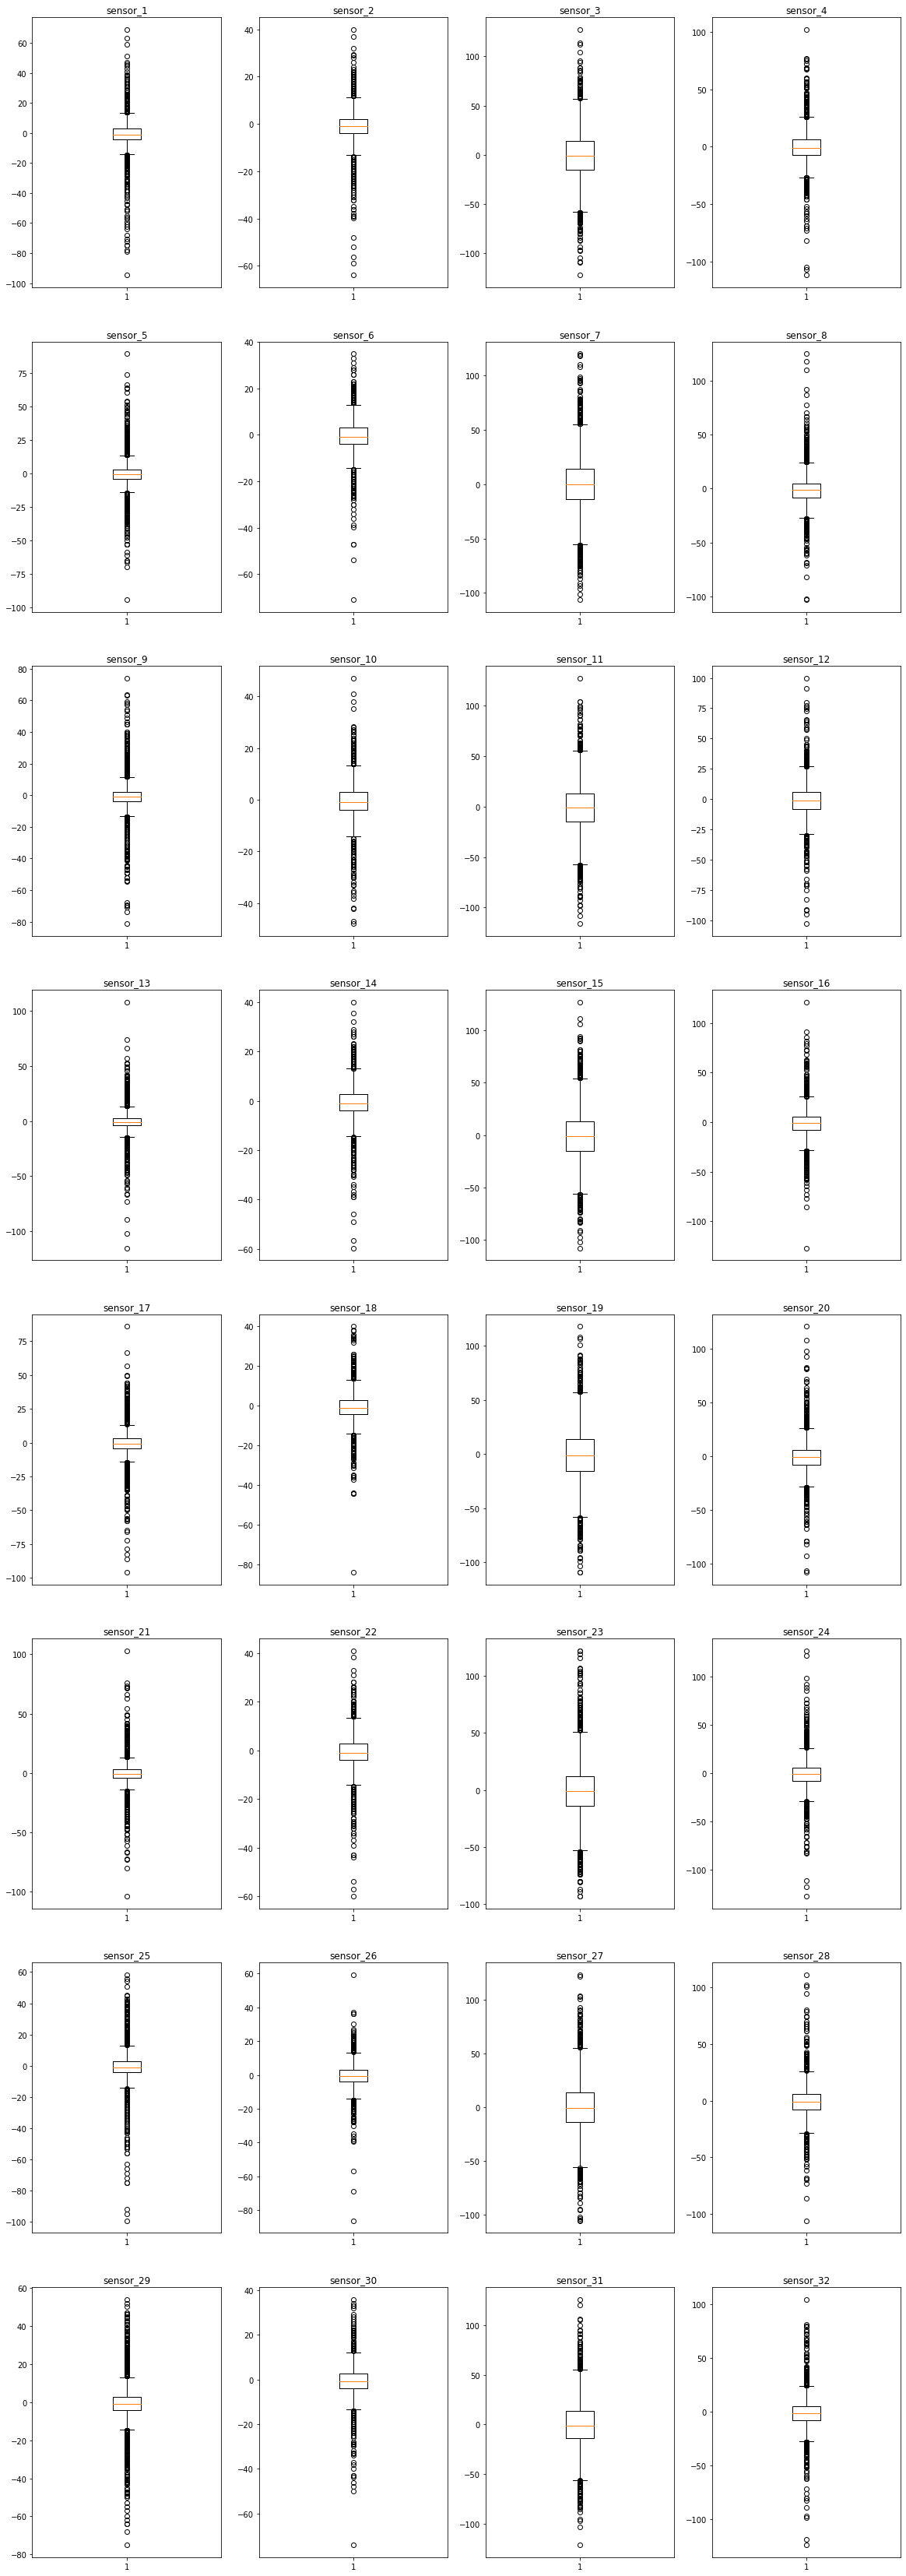

In [ ]:
feature = train_df.columns[:-1]

# box plot
plt.figure(figsize=(20, 60))

for i in range(len(feature)):
  plt.subplot(8, 4, i + 1)
  plt.title(feature[i])
  plt.boxplot(train_df[feature[i]])

plt.show()

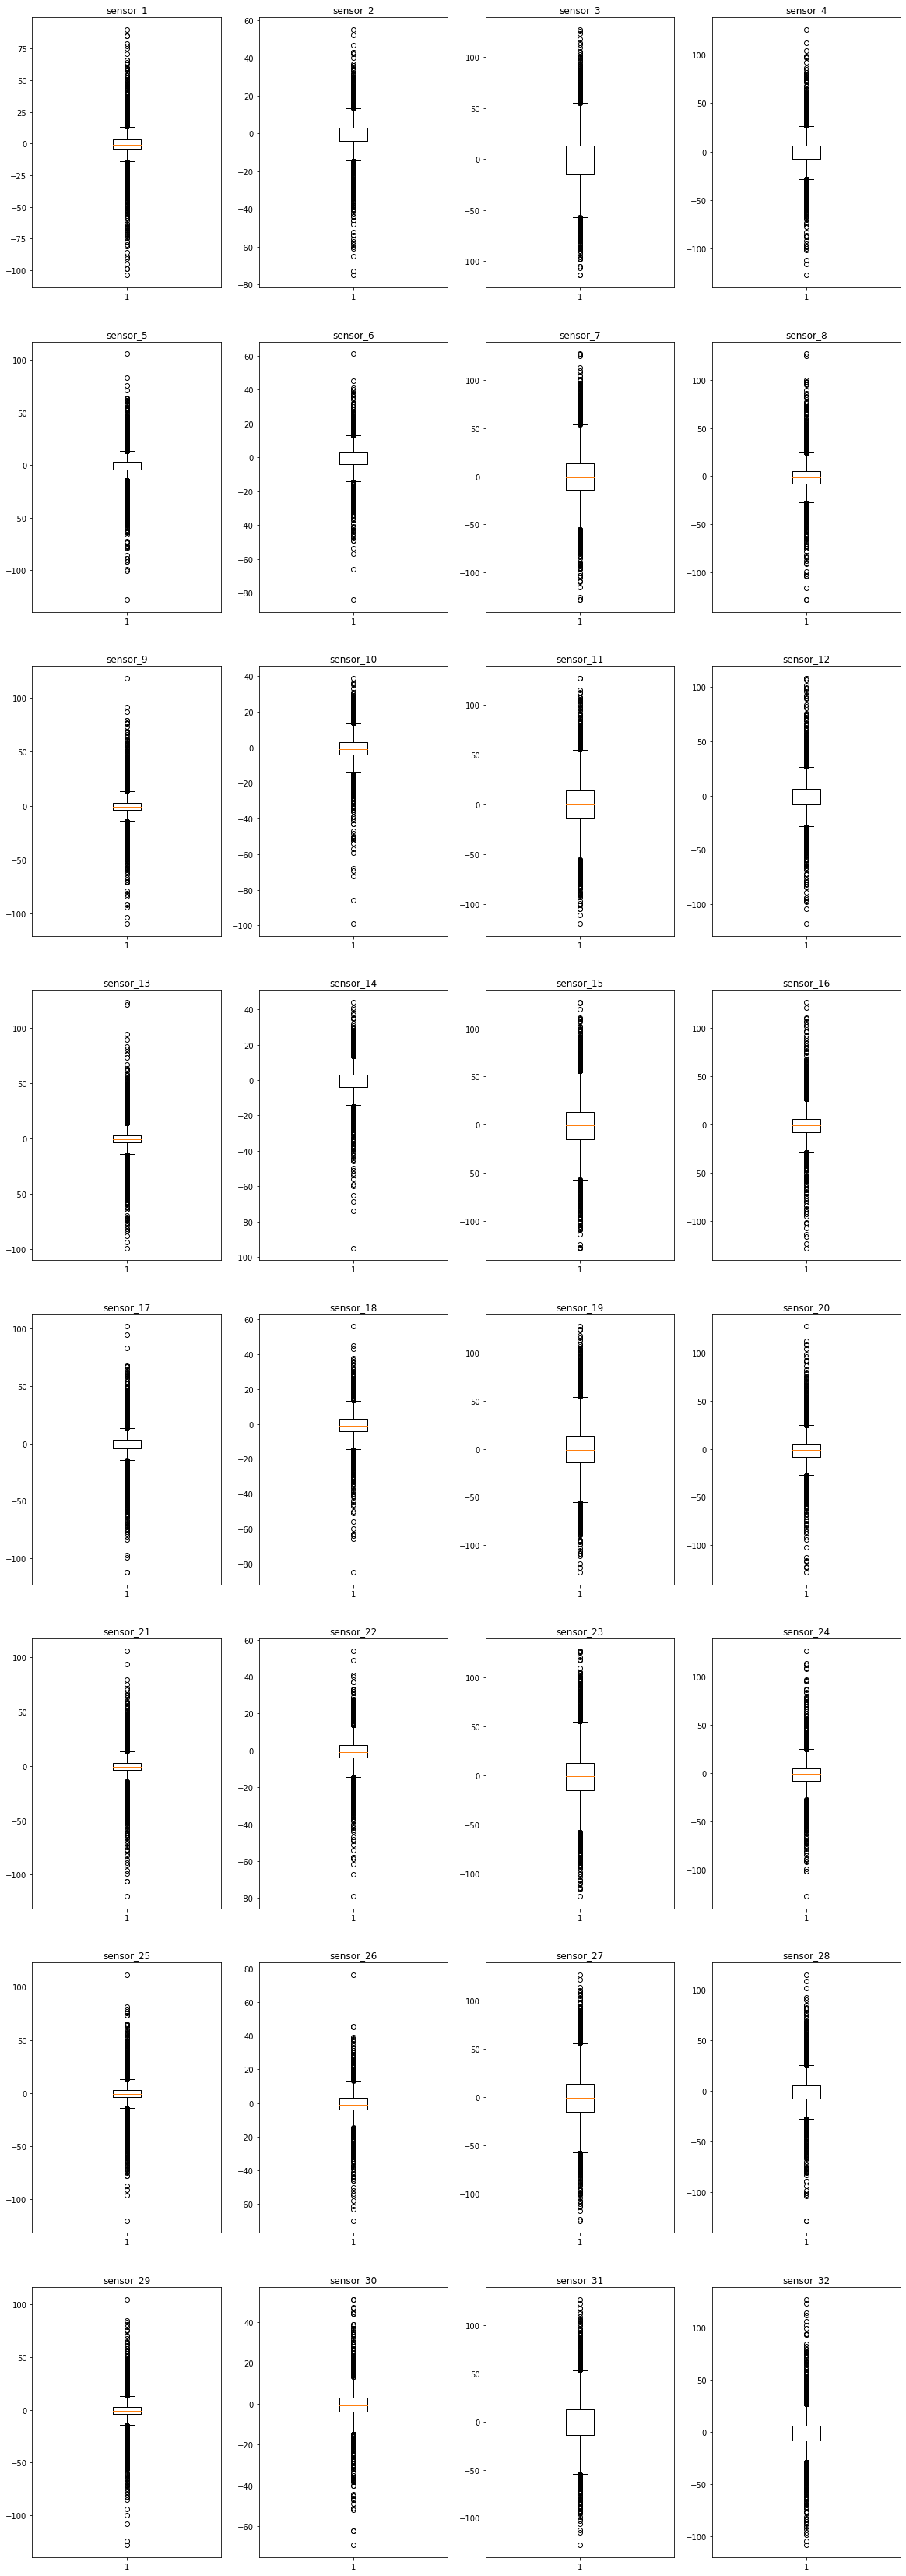

In [ ]:
# b
plt.figure(figsize=(20, 60))

for i in range(len(feature)):
  plt.subplot(8, 4, i + 1)
  plt.title(feature[i])
  plt.boxplot(test_df[feature[i]])

plt.show()

### 상관관계 분석

/usr/local/lib/python3.7/dist-packages/ipykernel_launcher.py:5: DeprecationWarning: `np.bool` is a deprecated alias for the builtin `bool`. To silence this warning, use `bool` by itself. Doing this will not modify any behavior and is safe. If you specifically wanted the numpy scalar type, use `np.bool_` here.
Deprecated in NumPy 1.20; for more details and guidance: https://numpy.org/devdocs/release/1.20.0-notes.html#deprecations
  """


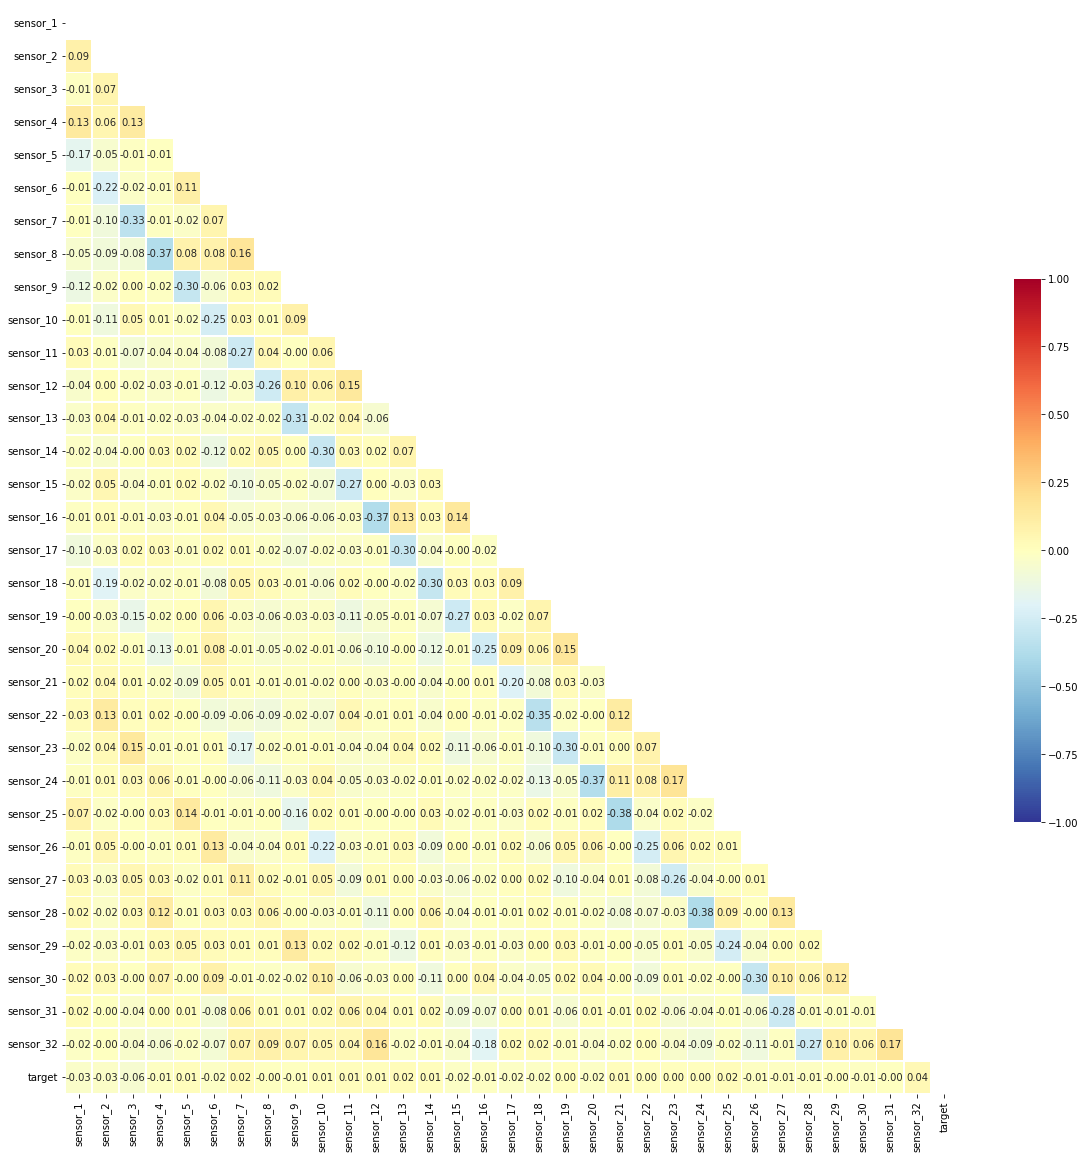

In [ ]:
df = train_df.corr()
fig, ax = plt.subplots(figsize=(20, 20))

# 삼각형 마스크 만들기(위쪽 삼각형에 True, 아래 삼각형에 False)
mask = np.zeros_like(df, dtype=np.bool)
mask[np.triu_indices_from(mask)] = True

sns.heatmap(data=df, 
            cmap = 'RdYlBu_r',
            annot=True, # 실제 값을 표시
            fmt='.2f', # 실제 값 표시 옵션
            mask = mask, # 표시하지 않을 마스크 부분 지정
            linewidths=.5, # 경계면 실선으로 구분하기
            cbar_kws={'shrink':.5}, # 컬러바 크기 절반으로 줄이기
            vmin = -1, vmax = 1 # 컬러바 범위
            )

## 3. 데이터 처리하기

In [ ]:
X = train_df.drop(['target'], axis=1)
X

,sensor_1,sensor_2,sensor_3,sensor_4,sensor_5,sensor_6,sensor_7,sensor_8,sensor_9,sensor_10,...,sensor_23,sensor_24,sensor_25,sensor_26,sensor_27,sensor_28,sensor_29,sensor_30,sensor_31,sensor_32
0,-6.149463,-0.929714,9.058368,-7.017854,-2.958471,0.179233,-0.956591,-0.972401,5.956213,4.145636,...,-6.066648,-7.026436,-6.006282,-6.005836,7.043084,21.884650,-3.064152,-5.247552,-6.026107,-11.990822
1,-2.238836,-1.003511,5.098079,-10.880357,-0.804562,-2.992123,26.972724,-8.900861,-5.968298,-4.060134,...,14.906205,-1.996714,-7.933806,-3.136773,8.774211,10.944759,9.858186,-0.969241,-3.935553,-15.892421
2,19.087934,-2.092514,0.946750,-21.831788,9.119235,17.853587,-21.069954,-15.933212,-9.016039,-5.975194,...,4.948570,-6.889685,54.052330,-6.109238,12.154595,6.095989,-40.195088,-3.958124,-8.079537,-5.160090
3,-2.211629,-1.930904,21.888406,-3.067560,-0.240634,2.985056,-29.073369,0.200774,-1.043742,2.099845,...,14.048298,-2.126170,-1.035526,2.178769,10.032723,-1.010897,-3.912848,-2.980338,-12.983597,-3.001077
4,3.953852,2.964892,-36.044802,0.899838,26.930210,11.004409,-21.962423,-11.950189,-20.933785,-4.000506,...,-6.051674,-2.051761,10.917567,1.905335,-13.004707,17.169552,2.105194,3.967986,11.861657,-27.088846
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
2330,-3.971043,39.913391,16.034626,-19.067697,8.061361,-70.916786,-39.937026,12.834223,-21.937973,14.942994,...,41.046160,3.086417,-4.954858,-11.106802,-37.863399,31.069292,-4.097017,-13.095192,-5.150284,8.016265
2331,-3.011710,-4.060355,-1.046067,4.178137,-2.003243,-2.895017,-2.766757,-29.099123,-4.208953,-4.793855,...,30.933458,6.871938,-0.134367,-0.867018,23.892336,-11.977934,1.984203,0.891666,28.822082,-0.878670
2332,-9.001824,5.985711,-8.146347,-10.902201,5.102105,8.133692,32.877614,-3.017438,-3.174442,-5.724941,...,57.874418,-7.952857,2.049467,-5.825790,-37.989569,15.014132,1.160272,-11.135889,-7.035763,-0.930067
2333,-3.987992,3.011460,-11.949323,-3.810885,16.880234,-5.150117,9.182801,4.960190,-21.002525,-1.881519,...,-6.008398,3.080276,2.054739,-1.052350,-6.019488,-7.075333,-5.826058,-3.989168,14.916905,-12.093426


데이터 내 칼럼별로 최솟값, 최댓값을 추출했습니다. 데이터들을 스케일링 하기 위한 목적입니다.

In [ ]:
mins = train_x.min()
maxs = train_x.max()

mins[:5]

In [ ]:
y = train_df['target']
y

0       1
1       1
2       0
3       1
4       2
       ..
2330    3
2331    3
2332    3
2333    1
2334    2
Name: target, Length: 2335, dtype: int64

In [ ]:
X_scaled = (X - mins) / (maxs - mins)
y_scaled = (y - mins) / (maxs - mins)

train_x.describe().T[['min', 'max']]

In [ ]:
# # train data 표준화
# scaler = StandardScaler()

# X_scaled = scaler.fit_transform(X)

# X_scaled = pd.DataFrame(X_scaled, columns=feature)

### train, test으로 나누기

In [ ]:
X_train, X_test, y_train, y_test = train_test_split(X_scaled, y_scaled, test_size=0.2, random_state=5)
y_train = y_train.values.ravel()

print(X_train.shape)
print(X_test.shape)
print(y_train.shape)
print(y_test.shape)

(1868, 32)
(467, 32)
(1868,)
(467,)


## 4. 모델 정의 & 학습

In [ ]:
model_dict = {
    "logistic": LogisticRegression(),
    "rf": RandomForestClassifier(n_estimators=100, max_depth=4),
    "adaboost": AdaBoostClassifier(n_estimators=100)
} # 여러 모델을 바구니에 담아둠

In [ ]:
model_result = {}

In [ ]:
print(X_train.shape)
print(X_test.shape)

(1868, 32)
(467, 32)


In [ ]:
for key in model_dict.keys():
  print("######## 훈련 중 ########")
  model = model_dict[key]
  model.fit(X_train, y_train)

  print("######## 예측 중 ########")
  model_result[key] = model.predict(X_test)

  print(key, model.score(X_test, y_test))

######## 훈련 중 ########
######## 예측 중 ########
logistic 0.3233404710920771
######## 훈련 중 ########
######## 예측 중 ########
rf 0.5952890792291221
######## 훈련 중 ########
######## 예측 중 ########
adaboost 0.6937901498929336


## 5. 예측하기

In [ ]:
# # test data 표준화
# scaler = StandardScaler()

# test_data = scaler.fit_transform(test_df)

# test_data = pd.DataFrame(test_data, columns=feature)

In [ ]:
mins = test_df.min()
maxs = test_df.max()

test_data = (test_df - mins) / (maxs - mins)
test_data.describe().T[['min', 'max']]

In [ ]:
adaboost_submit = submission_df.copy()

In [ ]:
adaboost_submit["target"] = model_dict["adaboost"].predict(test_data)

adaboost_submit

,id,target
0,1,0
1,2,0
2,3,1
3,4,1
4,5,2
...,...,...
9338,9339,0
9339,9340,3
9340,9341,2
9341,9342,0


In [ ]:
adaboost_submit.to_csv(data_path+"submission.csv", index=False)

참고
* https://dacon.io/competitions/official/235876/codeshare/4608?page=1&dtype=recent
* https://m.blog.naver.com/kiddwannabe/221763497317